In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt

In [2]:
positions, velocity = [], []

with open("input.txt") as inp:
    for line in map(lambda x: x.rstrip(), inp.readlines()):
        pos = re.findall("<(.+?)>", line)
        positions.append(list(map(int, pos[0].split(", "))))
        velocity.append(list(map(int, pos[1].split(", "))))

moved = 0

def move(i=0):
    global positions, velocity, moved
    if i >= 0:
        for j in range(i + 1):
            positions += velocity
            moved += 1
    else:
        for j in range(0, i, -1):
            positions -= velocity
            moved -= 1

    x_min = min(positions[:, 1])
    y_min = min(positions[:, 0])
    x_max = max(positions[:, 1])
    y_max = max(positions[:, 0])
    return x_max - x_min, y_max - y_min


def print_field(positions):
    x_min = min(positions[:, 1])
    y_min = min(positions[:, 0])
    positions -= min(x_min, y_min)

    x_max = max(positions[:, 1])
    y_max = max(positions[:, 0])

    field = np.zeros((x_max+1, y_max+1), dtype=object)
    field.fill(".")
    for pos in positions:
        field[pos[1], pos[0]] = "#"
    ind = [("#" in line) for line in field]
#     uncomment to print
#     for line in field[ind]:
#         print(*line)


positions = np.array(positions)
velocity = np.array(velocity)

dx, dy = move()
dx_new, dy_new = move()
while dx - dx_new > 0 and dy - dy_new > 0:
    dx = dx_new
    dy = dy_new
    dx_new, dy_new = move()

move(-1)
print_field(positions)
y, x = positions[:, 0][::-1], positions[:, 1][::-1]
#     uncomment to see
# ax = plt.scatter(y, x)
# ax = plt.gca()
# ax.set_ylim(ax.get_ylim()[::-1])
# plt.show()
print(moved)

10243


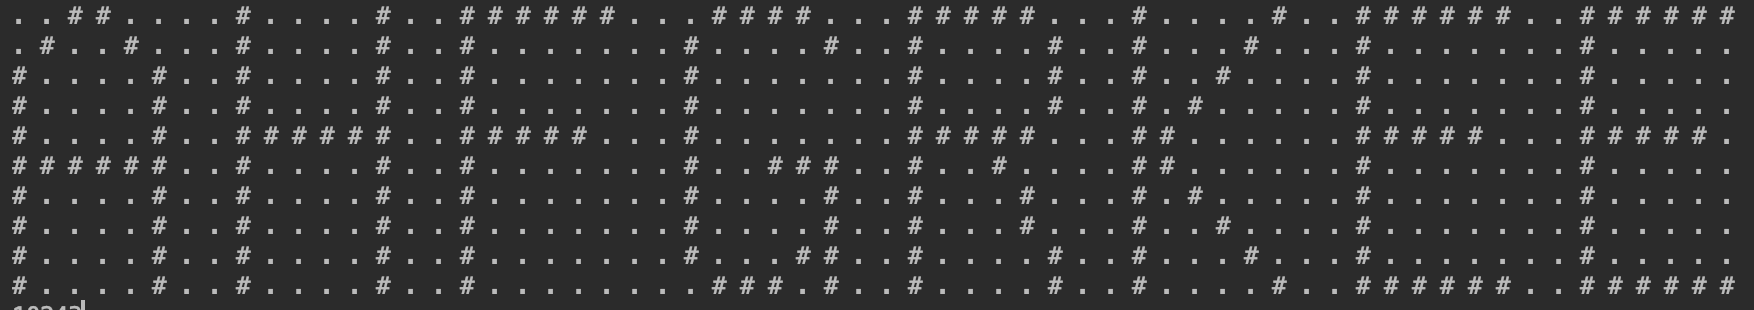